In [169]:
import os,sys
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

In [170]:
df=pd.read_csv('/Users/ananyahegde/Desktop/IEEE/data/control/control_1.csv')


In [171]:
df.head()

,timestamp,date,activity
0,2003-03-18 15:00:00,2003-03-18,60
1,2003-03-18 15:01:00,2003-03-18,0
2,2003-03-18 15:02:00,2003-03-18,264
3,2003-03-18 15:03:00,2003-03-18,662
4,2003-03-18 15:04:00,2003-03-18,293


In [172]:
df.timestamp = df.timestamp.str.split(' ', expand=True)[[1]]
df

,timestamp,date,activity
0,15:00:00,2003-03-18,60
1,15:01:00,2003-03-18,0
2,15:02:00,2003-03-18,264
3,15:03:00,2003-03-18,662
4,15:04:00,2003-03-18,293
...,...,...,...
51606,12:06:00,2003-04-23,3
51607,12:07:00,2003-04-23,3
51608,12:08:00,2003-04-23,3
51609,12:09:00,2003-04-23,3


In [173]:
#hourly:
df['hour'] = df.timestamp.str.split(':', expand=True)[[0]]
df['hour']

0        15
1        15
2        15
3        15
4        15
         ..
51606    12
51607    12
51608    12
51609    12
51610    12
Name: hour, Length: 51611, dtype: object

In [174]:
ab = df.groupby(['date', 'hour'])['activity'].mean()
df_agg = pd.DataFrame(columns=('date','hour','Avg_activity'))  #to create an empty dataframe
for i in range(0,len(ab)):
    df_agg=df_agg.append({'date':ab.index[i][0],'hour': ab.index[i][1],'Avg_activity': round(ab[i],2)},ignore_index=True)
df_agg


,date,hour,Avg_activity
0,2003-03-18,15,156.48
1,2003-03-18,16,264.55
2,2003-03-18,17,1105.13
3,2003-03-18,18,338.63
4,2003-03-18,19,567.83
...,...,...,...
856,2003-04-23,08,5.83
857,2003-04-23,09,3.0
858,2003-04-23,10,14.52
859,2003-04-23,11,3.97


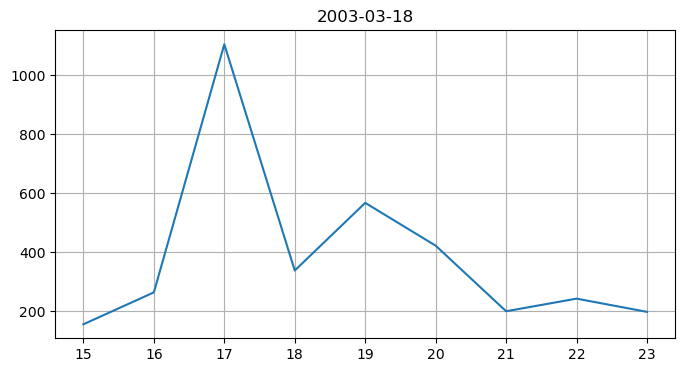

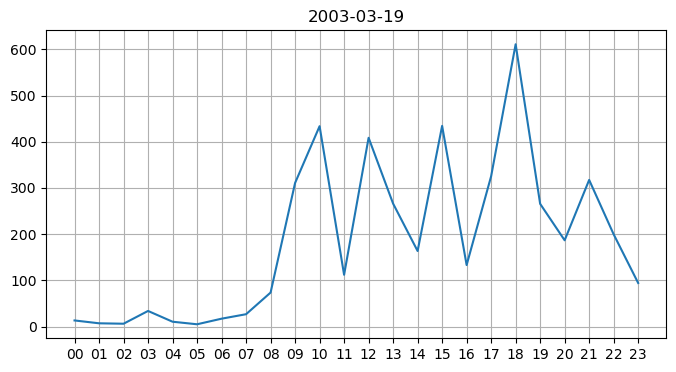

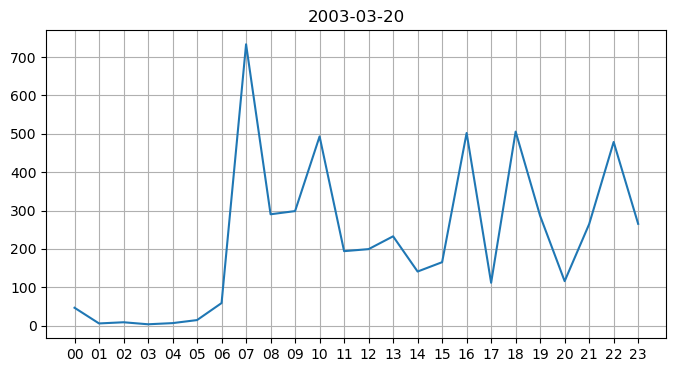

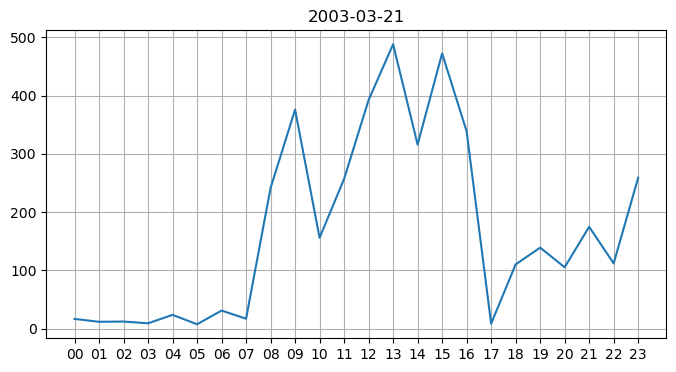

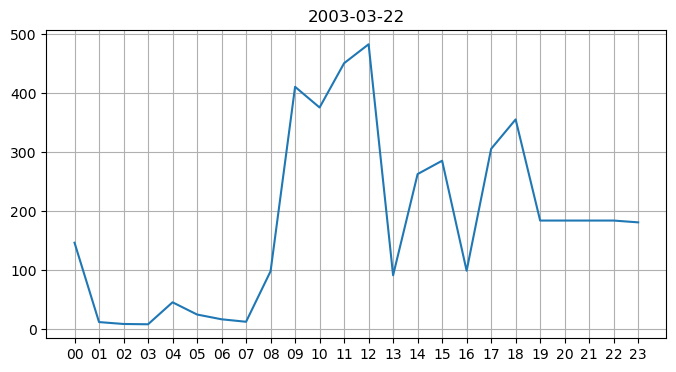

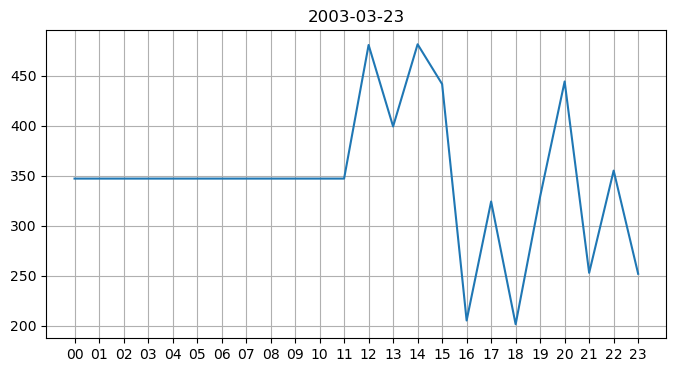

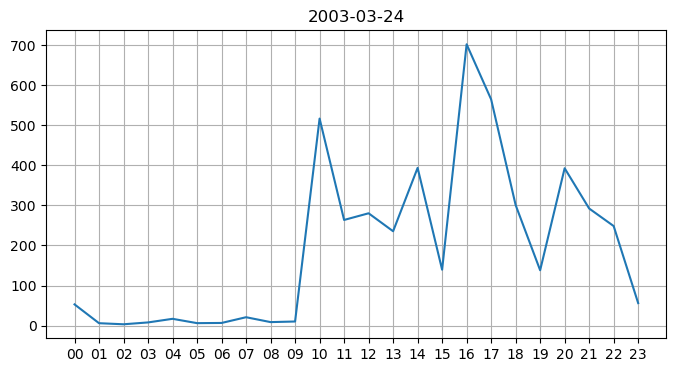

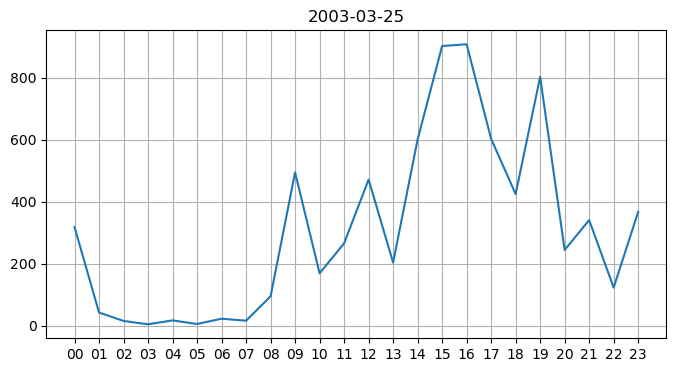

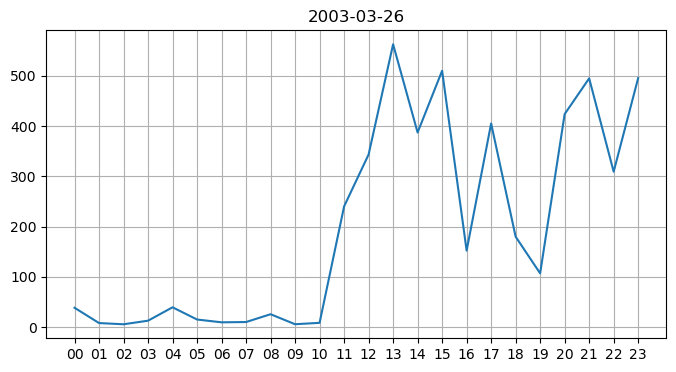

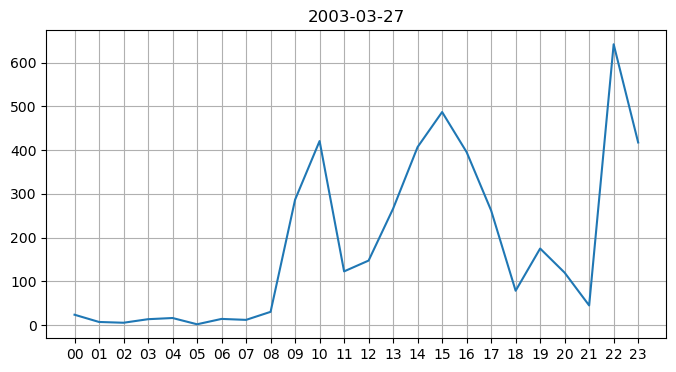

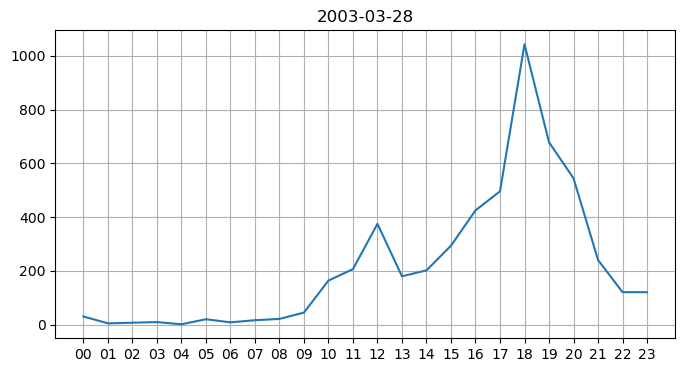

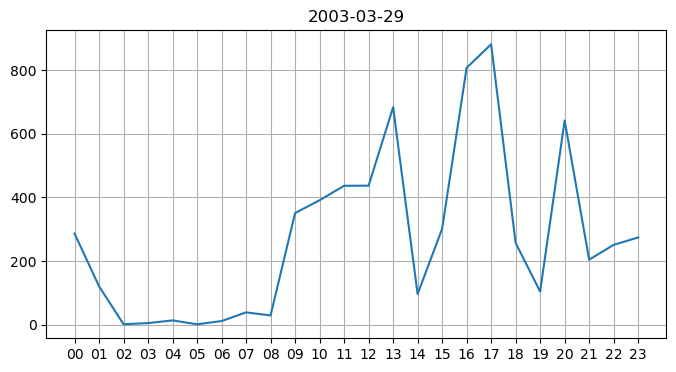

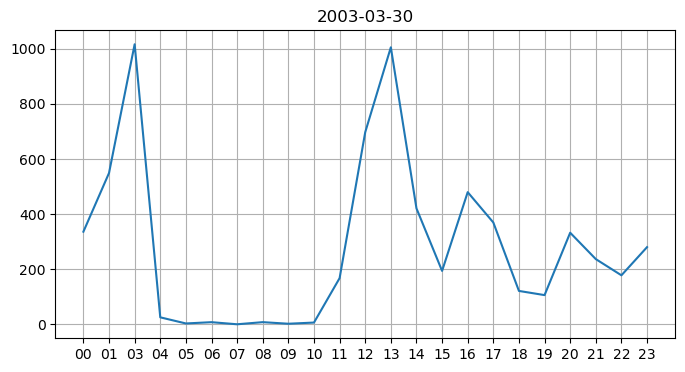

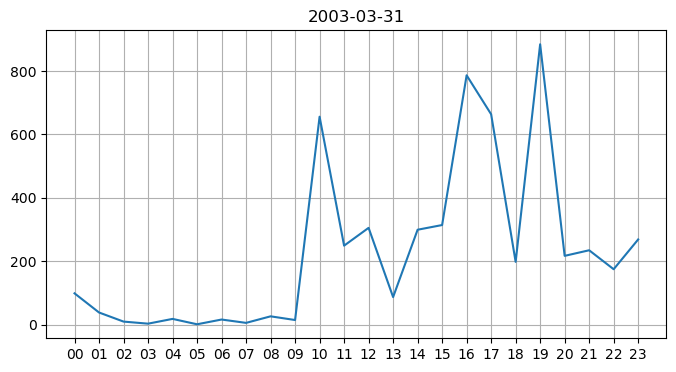

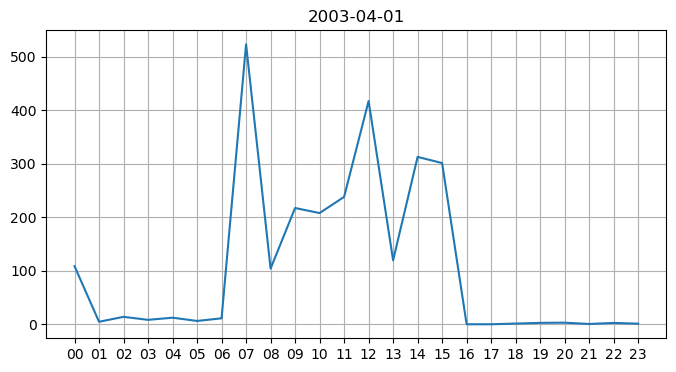

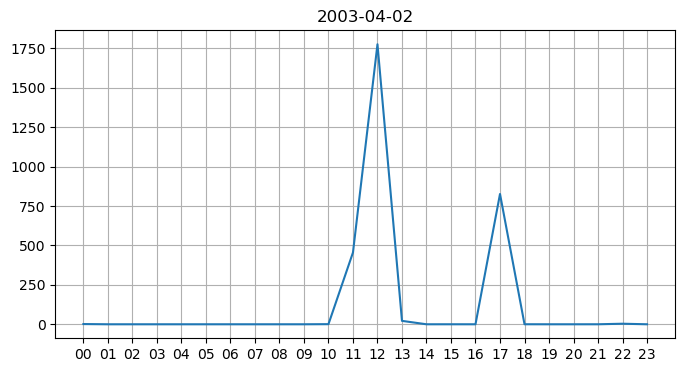

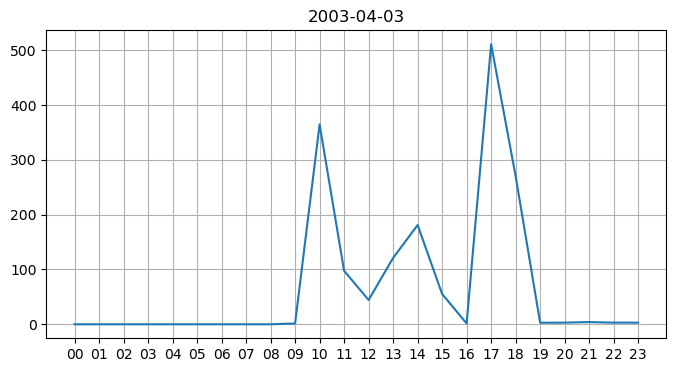

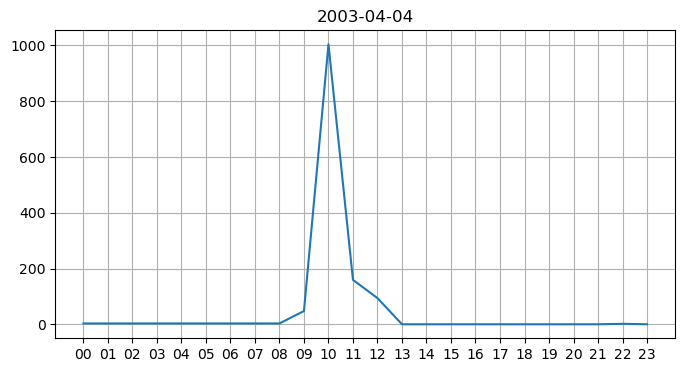

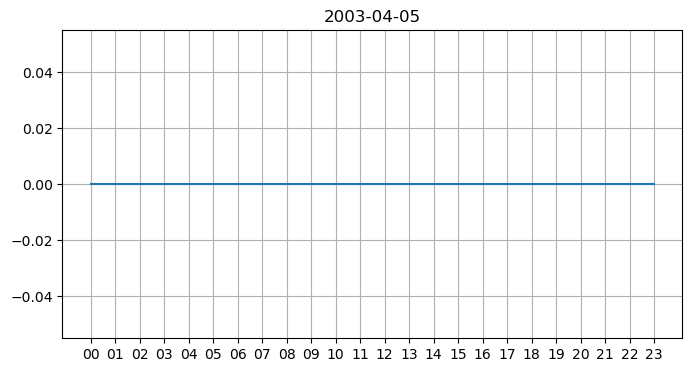

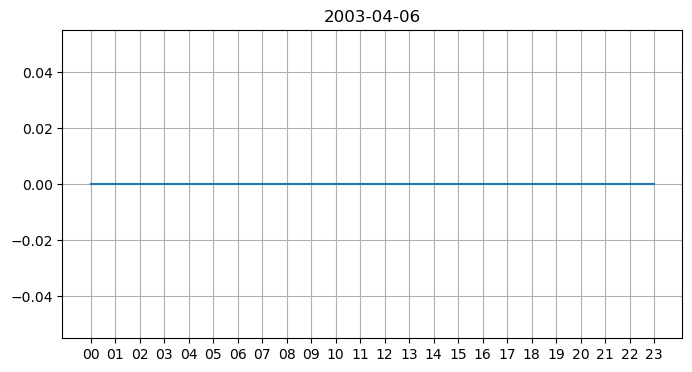

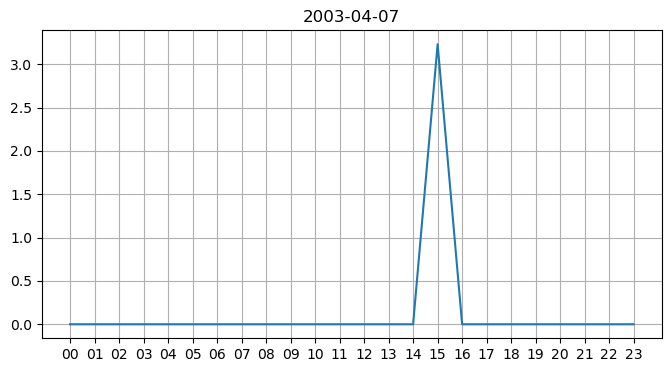

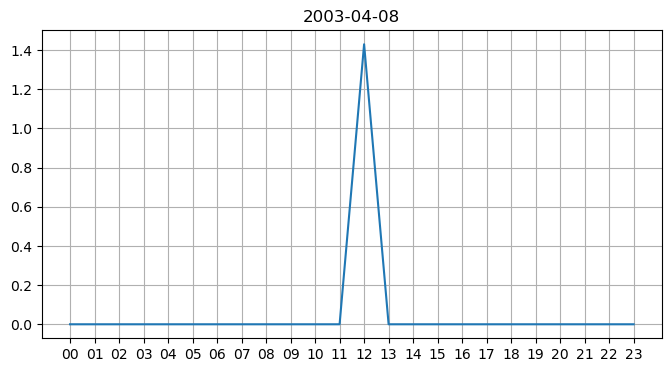

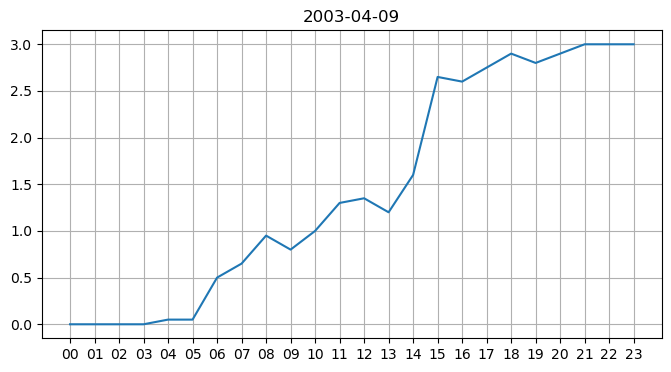

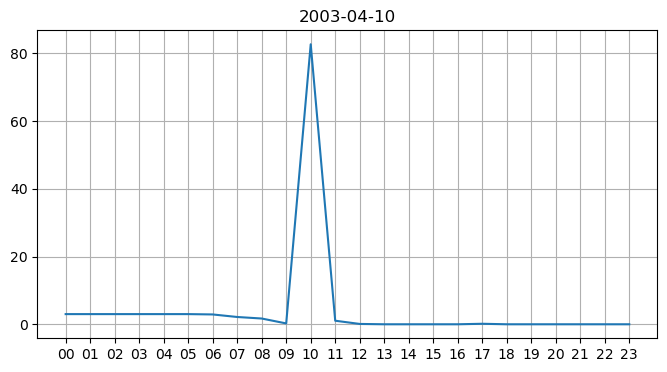

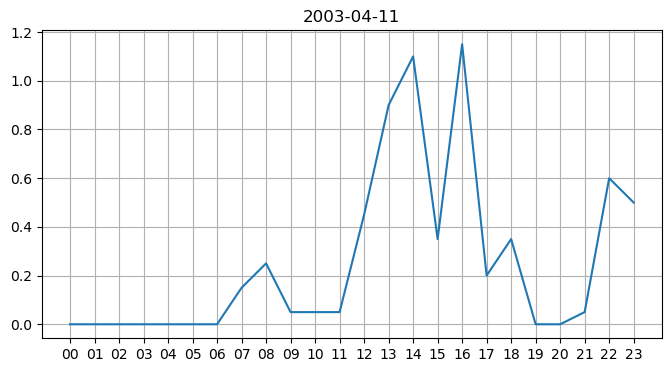

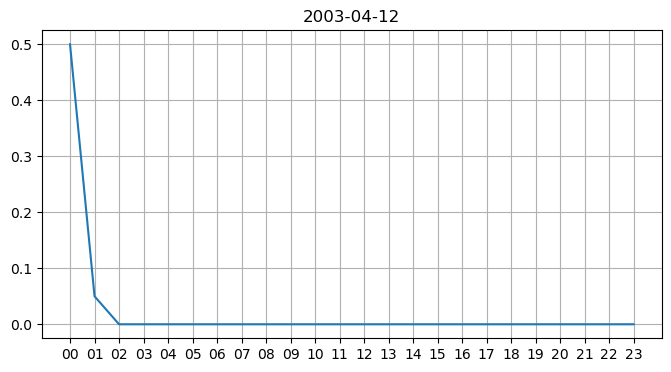

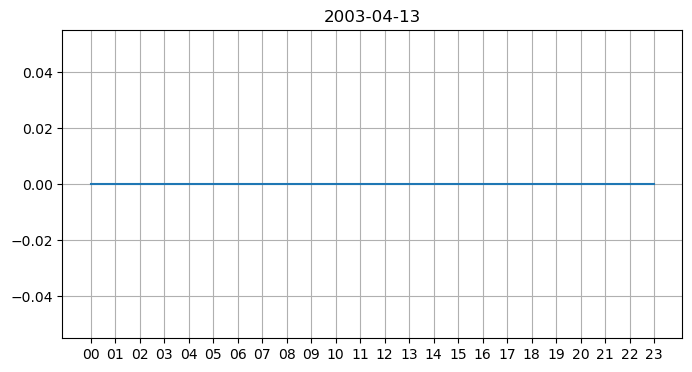

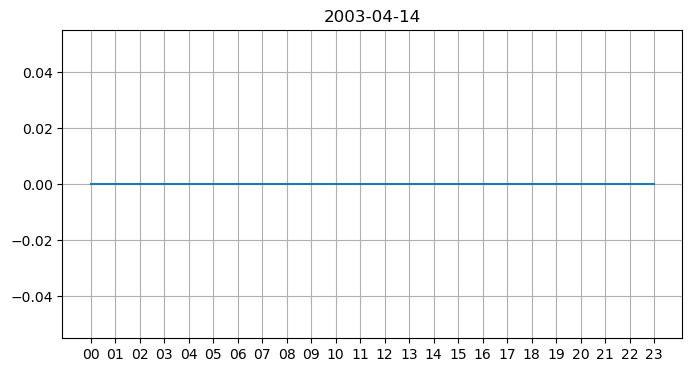

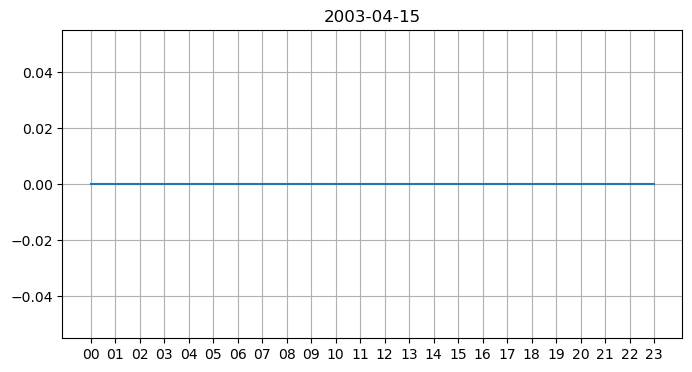

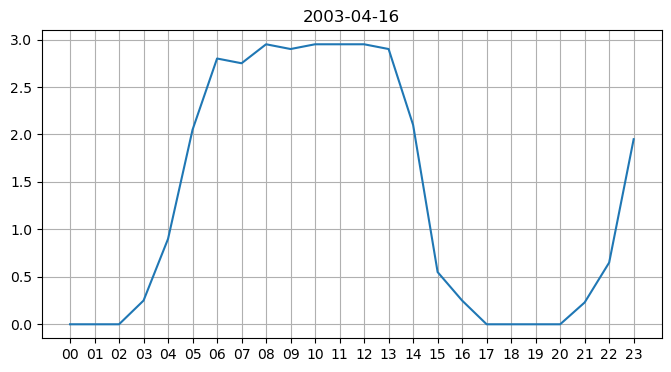

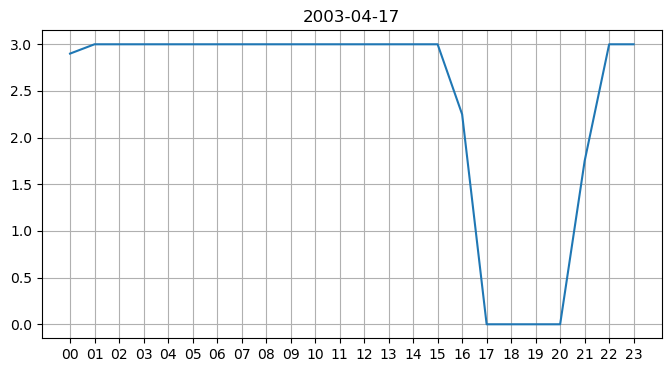

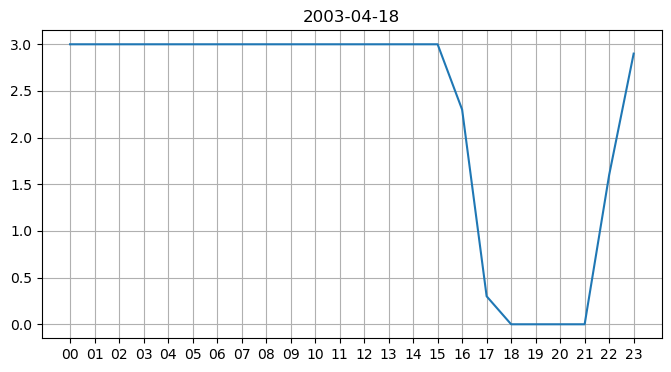

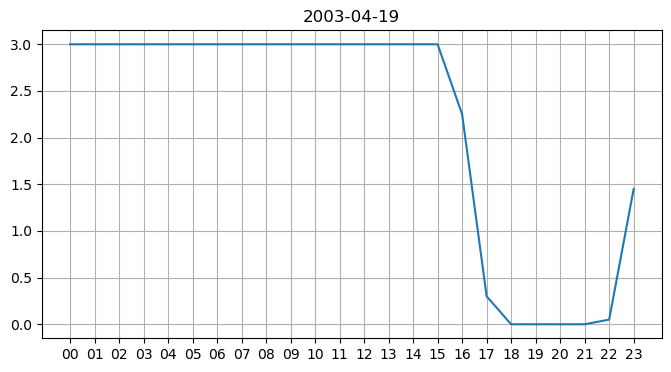

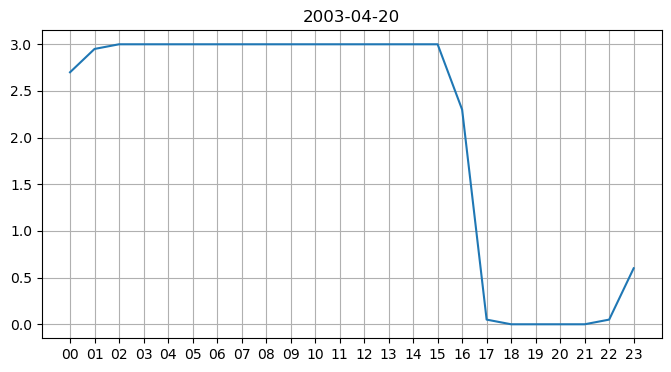

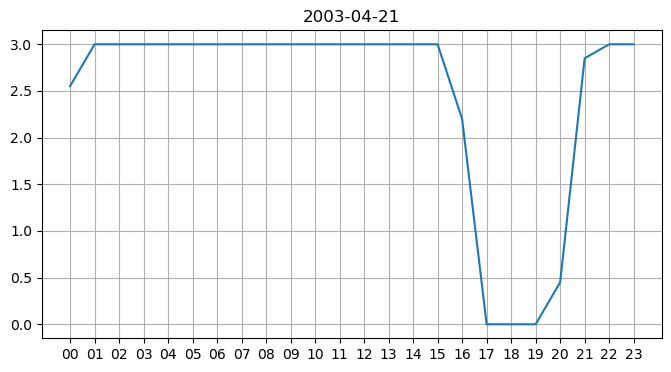

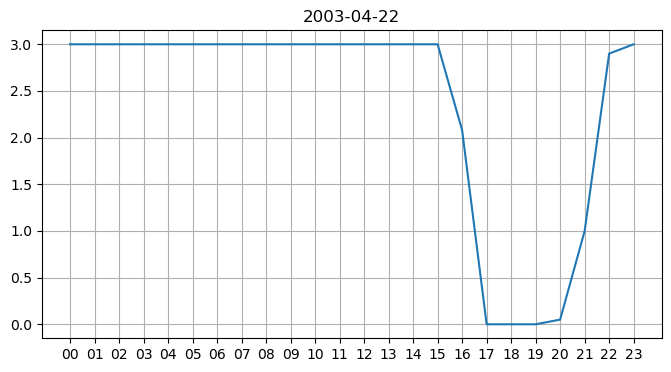

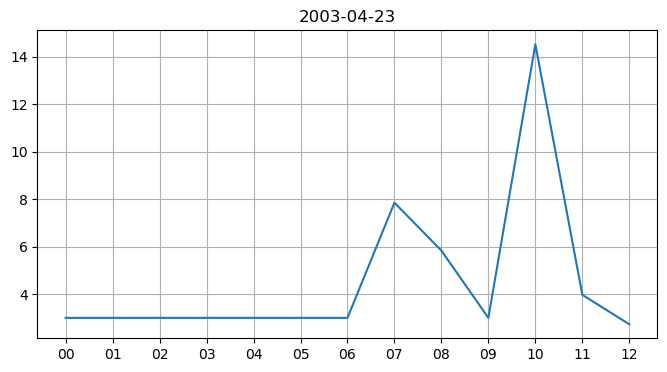

In [175]:

for i in df_agg.date.unique():
    plt.figure(figsize=(8,4))
    selected_data = df_agg.loc[df_agg['date'] == i]
#     print(selected_data)
    plt.plot(selected_data['hour'], selected_data['Avg_activity'])
    plt.title(i)
    plt.grid()
    plt.show()

### Further tasks:
1. Plot a subgraph for 4 days activity (sample is shown in the below image). The x-axis will be 24 hours, and y-axis is average activity during hours
2. Repeat the same for condition 1
3. Observe the 4 days activity of control 1, 2, 3 and condition 1,2,3
4. Draw a scatter plot of control 1 and condition 1 average activities in two different colors on a same graph. Draw one more scatter plot of control 2 and condition 2
5. Perform statistical hypothesis testing to check whether controls and conditions have same average activity or not. Use appropriate test statistic.
6. Read about Time Series data Classification: Read online articles and research papers and think about implementing the same on this data.  Few articles:
- https://developer.ibm.com/learningpaths/get-started-time-series-classification-api/what-is-time-series-classification/
- https://www.analyticsvidhya.com/blog/2019/01/introduction-time-series-classification/
- https://towardsdatascience.com/a-brief-introduction-to-time-series-classification-algorithms-7b4284d31b97


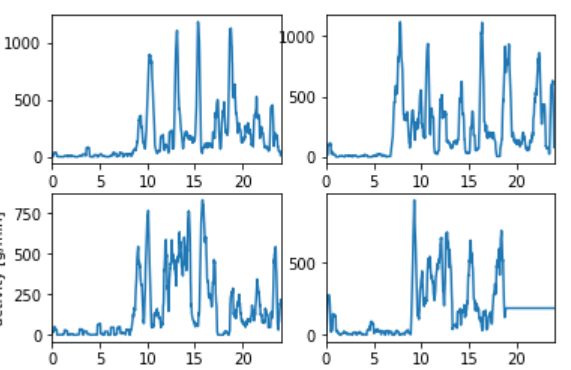

In [180]:
df_unique_date=df_agg.date.unique()
unique_date=[]
for i in range(1,5):
    unique_date.append(df_unique_date[i])

unique_date

['2003-03-19', '2003-03-20', '2003-03-21', '2003-03-22']

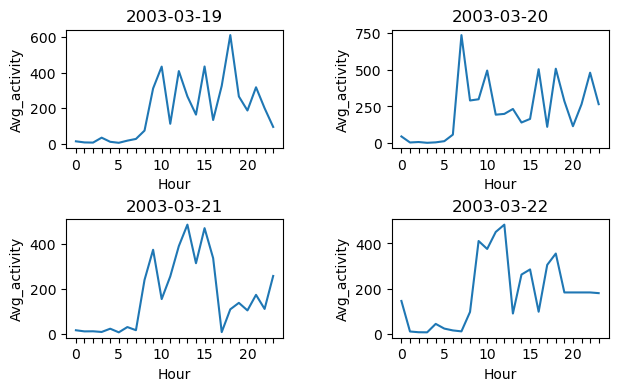

In [191]:
fig = plt.figure(figsize=(7,4))
fig.subplots_adjust(hspace=0.6, wspace=0.5)
for i in range(1, 5):
    selected_data = df_agg.loc[df_agg['date'] == unique_date[i-1]]
    ax = fig.add_subplot(2, 2, i)
    ax.plot(selected_data['hour'], selected_data['Avg_activity'])
    plt.title(unique_date[i-1])
#     plt.grid()
#     plt.xticks(rotation = 90)
    plt.xticks(np.arange(0,24,1), [i if i in range(0,23,5) else '' for i in range(24)])
    plt.xlabel("Hour")
    plt.ylabel("Avg_activity")
#     plt.savefig('control4_subplots.png')
